<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных." data-toc-modified-id="Загрузка-и-подготовка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-анализ-данных" data-toc-modified-id="Загрузка-и-анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и анализ данных</a></span></li><li><span><a href="#Лемматизация-и-очистка-текста" data-toc-modified-id="Лемматизация-и-очистка-текста-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация и очистка текста</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Создайм-матрицы-cо-значениями-TF-IDF-по-корпусам-комментариев" data-toc-modified-id="Создайм-матрицы-cо-значениями-TF-IDF-по-корпусам-комментариев-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Создайм матрицы cо значениями TF-IDF по корпусам комментариев</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Векторная-классификация-линейной-поддержки" data-toc-modified-id="Векторная-классификация-линейной-поддержки-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Векторная классификация линейной поддержки</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели-и-проверка-на-адекватность" data-toc-modified-id="Тестирование-лучшей-модели-и-проверка-на-адекватность-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование лучшей модели и проверка на адекватность</a></span></li><li><span><a href="#Проект-для-&quot;Викишоп&quot;-с-BERT" data-toc-modified-id="Проект-для-&quot;Викишоп&quot;-с-BERT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проект для "Викишоп" с BERT</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75.

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели.
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

**Цель:** Обучить модель классифицировать комментарии на позитивные и негативные.
     
   Работа пройдёт в несколько этапов:
 1. Загрузка и подготовка данных.
 2. Обучение моделей.   
 3. Тестирование лучшей модели.
 4. Проект для "Викишоп" с BERT.
 5. Общий вывод.

**Столбец text в нём содержит текст комментария, а toxic — целевой признак.**

In [1]:
!pip install -q transformers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import spacy
import torch
import transformers

from time import time
from tqdm.auto import tqdm
from tqdm import notebook

import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score,  confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier

from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter('ignore')

RANDOM_STATE = 123

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Загрузка и подготовка данных.

### Загрузка и анализ данных

In [3]:
# загрузим датасет
if os.path.exists('13.1. toxic_comments.csv'):
    data = pd.read_csv('13.1. toxic_comments.csv', index_col=0)
elif os.path.exists('/datasets/toxic_comments.csv'):
    data = pd.read_csv('/datasets/toxic_comments.csv', index_col=0)
elif os.path.exists('./toxic_comments.csv'):
    data = pd.read_csv('./toxic_comments.csv', index_col=0)
else:
    print('Nothing works.')
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [6]:
# проверим дубликаты
df.duplicated().sum()

0

In [7]:
# посмотрим на распределение классов в 'toxic'
df.toxic.value_counts(normalize=True)

0    0.898388
1    0.101612
Name: toxic, dtype: float64

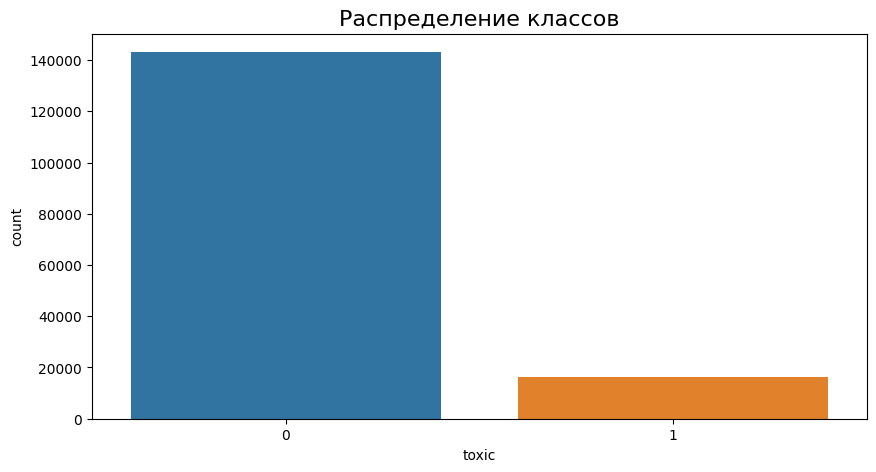

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df.toxic)
plt.title('Распределение классов', fontsize=16);

**Вывод:**      
Мы загрузили даннын:   
+ пропуски отсутствуют    
+ дубликаты отсутствуют   
+ негативных комментариев около 10%

### Лемматизация и очистка текста

In [9]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

In [10]:
str3 = df.text[3]
str3

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [11]:
def clear_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\']', ' ', text)
    return " ".join(text.split())

In [12]:
str3 = clear_text(str3)
str3

"more i can't make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it's listed in the relevant form eg wikipedia good article nominations transport"

In [15]:
%%time
df['lemm_text'] = df['text'].apply(clear_text)

CPU times: user 7.43 s, sys: 103 ms, total: 7.53 s
Wall time: 12.1 s


In [16]:
%%time
lemm_texts = []
total = df.shape[0]
nlp_pipe = nlp.pipe(df['lemm_text'].values, disable = ['ner', 'parser'])

for doc in tqdm(nlp_pipe, total=total):
    lemm_text = " ".join([token.lemma_ for token in doc])
    lemm_texts.append(lemm_text)

  0%|          | 0/159292 [00:00<?, ?it/s]

CPU times: user 11min 19s, sys: 5.51 s, total: 11min 24s
Wall time: 11min 43s


In [17]:
lemm_texts[3]

'more I can not make any real suggestion on improvement I wonder if the section statistic should be later on or a subsection of type of accident I think the reference may need tidying so that they be all in the exact same format ie date format etc I can do that later on if no one else do first if you have any preference for format style on reference or want to do it yourself please let I know there appear to be a backlog on article for review so I guess there may be a delay until a reviewer turn up it be list in the relevant form eg wikipedia good article nomination transport'

In [ ]:
df['lemm_text'] = lemm_texts

In [19]:
df['lemm_text'].loc[3]

'more I can not make any real suggestion on improvement I wonder if the section statistic should be later on or a subsection of type of accident I think the reference may need tidying so that they be all in the exact same format ie date format etc I can do that later on if no one else do first if you have any preference for format style on reference or want to do it yourself please let I know there appear to be a backlog on article for review so I guess there may be a delay until a reviewer turn up it be list in the relevant form eg wikipedia good article nomination transport'

In [20]:
def clear_text2(text):
    text = text.lower()
    text = re.sub(r'[^a-z]', ' ', text)
    return " ".join(text.split())

In [21]:
%%time
df['lemm_text'] = df['lemm_text'].apply(clear_text2)

CPU times: user 5.35 s, sys: 12.8 ms, total: 5.36 s
Wall time: 5.46 s


In [22]:
df['lemm_text'].loc[3]

'more i can not make any real suggestion on improvement i wonder if the section statistic should be later on or a subsection of type of accident i think the reference may need tidying so that they be all in the exact same format ie date format etc i can do that later on if no one else do first if you have any preference for format style on reference or want to do it yourself please let i know there appear to be a backlog on article for review so i guess there may be a delay until a reviewer turn up it be list in the relevant form eg wikipedia good article nomination transport'

In [23]:
df.head()

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,d aww he match this background colour i be see...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i be really not try to edit war it be ...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can not make any real suggestion on imp...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


**Вывод:**   
Мы очистили текст от ненужных знаков и пробелов. С помощью библиотеки SpaCy лемматизировали текст.

### Разделение на выборки

**Учитывая, что колонка 'text' по сути то же самое, что и 'lemm_text' за признак мы возьмём 'lemm_text'.**

In [27]:
# разобьём данные на признаки и целевой признак
X = df['lemm_text']
y = df['toxic']

In [28]:
# разобьём на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=RANDOM_STATE,
                                                    shuffle=True,
                                                    stratify=y)

In [29]:
# проверим длины наших выборок
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((143362,), (143362,), (15930,), (15930,))

In [30]:
corpus_train = X_train.values
corpus_test = X_test.values

**Вывод по пункту 1.:**   
+ при загрузке данных выяснили, что пропуски и дубликаты отсутствуют, классы в таргете не сбалансированы.     
+ лемматизировали и очистили текст от знаков пунктуации и пробелов.           
+ разделили данные на трейн и тест      
+ создали матрицы cо значениями TF-IDF

## Обучение

### Логистическая регрессия

In [34]:
pipe_LR = Pipeline(
    [
        ("vect", TfidfVectorizer(stop_words=list(stopwords))),
        ("model_LR", LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', max_iter=500)),
    ]
)
grid_par_LR = {'model_LR__C': [6, 6.1, 6.2],
               'model_LR__max_iter': [81, 85]}
cv_LR = GridSearchCV(pipe_LR, grid_par_LR, scoring='f1', verbose=10)

In [35]:
%%time
t0 = time()
cv_LR.fit(corpus_train, y_train)
print(f'Лучший параметр: {cv_LR.best_params_}\nЛучший показатель F1 для логистической регрессии: {cv_LR.best_score_:.6f}')
end_LR = time() - t0

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START model_LR__C=6, model_LR__max_iter=81........................
[CV 1/5; 1/6] END model_LR__C=6, model_LR__max_iter=81;, score=0.761 total time=  14.0s
[CV 2/5; 1/6] START model_LR__C=6, model_LR__max_iter=81........................
[CV 2/5; 1/6] END model_LR__C=6, model_LR__max_iter=81;, score=0.752 total time=  19.6s
[CV 3/5; 1/6] START model_LR__C=6, model_LR__max_iter=81........................
[CV 3/5; 1/6] END model_LR__C=6, model_LR__max_iter=81;, score=0.766 total time=  16.7s
[CV 4/5; 1/6] START model_LR__C=6, model_LR__max_iter=81........................
[CV 4/5; 1/6] END model_LR__C=6, model_LR__max_iter=81;, score=0.772 total time=  15.5s
[CV 5/5; 1/6] START model_LR__C=6, model_LR__max_iter=81........................
[CV 5/5; 1/6] END model_LR__C=6, model_LR__max_iter=81;, score=0.764 total time=  13.0s
[CV 1/5; 2/6] START model_LR__C=6, model_LR__max_iter=85........................
[CV 1/5; 2/6] 

In [36]:
res_LR = ['Логическая регрессия', f'{end_LR/60:.6f} минут', round(cv_LR.best_score_, 6)]

### Случайный лес

In [38]:
pipe_RF = Pipeline(
    [
        ("vect", TfidfVectorizer(stop_words=list(stopwords))),
        ("model_RF", RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')),
    ]
)
grid_par_RF = {'model_RF__max_depth': [200, 220],
              'model_RF__n_estimators': [300]}
cv_RF = GridSearchCV(pipe_RF, grid_par_RF, scoring='f1', cv=3, verbose=10)

In [39]:
%%time
t0 = time()
cv_RF.fit(corpus_train, y_train)
print(f'Лучший параметр: {cv_RF.best_params_}\nЛучший показатель F1 для RandomForest: {cv_RF.best_score_:.6f}')
end_RF = time() - t0

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START model_RF__max_depth=200, model_RF__n_estimators=300.........
[CV 1/3; 1/2] END model_RF__max_depth=200, model_RF__n_estimators=300;, score=0.596 total time=12.5min
[CV 2/3; 1/2] START model_RF__max_depth=200, model_RF__n_estimators=300.........
[CV 2/3; 1/2] END model_RF__max_depth=200, model_RF__n_estimators=300;, score=0.585 total time=12.3min
[CV 3/3; 1/2] START model_RF__max_depth=200, model_RF__n_estimators=300.........
[CV 3/3; 1/2] END model_RF__max_depth=200, model_RF__n_estimators=300;, score=0.604 total time=12.2min
[CV 1/3; 2/2] START model_RF__max_depth=220, model_RF__n_estimators=300.........
[CV 1/3; 2/2] END model_RF__max_depth=220, model_RF__n_estimators=300;, score=0.603 total time=13.4min
[CV 2/3; 2/2] START model_RF__max_depth=220, model_RF__n_estimators=300.........
[CV 2/3; 2/2] END model_RF__max_depth=220, model_RF__n_estimators=300;, score=0.589 total time=14.1min
[CV 3/3; 2/2] START m

In [40]:
res_RF = ['Случайный лес', f'{end_RF/60:.6f} минут', round(cv_RF.best_score_, 6)]

### LightGBM

In [42]:
pipe_LGBM = Pipeline(
    [
        ("vect", TfidfVectorizer(stop_words=list(stopwords))),
        ("model_LGBM", LGBMClassifier(random_state=RANDOM_STATE, class_weight='balanced')),
    ]
)
grid_par_LGBM = {'model_LGBM__max_depth': [45, 50],
                'model_LGBM__n_estimators': [300],
                'model_LGBM__num_leaves': [170, 200]}
cv_LGBM = GridSearchCV(pipe_LGBM, grid_par_LGBM, scoring='f1', cv=3, verbose=10)

In [43]:
%%time
t0 = time()
cv_LGBM.fit(corpus_train, y_train)
print(f'Лучший параметр: {cv_LGBM.best_params_}\nЛучший показатель F1 для LightGBM: {cv_LGBM.best_score_:.6f}')
end_LGBM = time() - t0

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START model_LGBM__max_depth=45, model_LGBM__n_estimators=300, model_LGBM__num_leaves=170
[CV 1/3; 1/4] END model_LGBM__max_depth=45, model_LGBM__n_estimators=300, model_LGBM__num_leaves=170;, score=0.773 total time= 3.7min
[CV 2/3; 1/4] START model_LGBM__max_depth=45, model_LGBM__n_estimators=300, model_LGBM__num_leaves=170
[CV 2/3; 1/4] END model_LGBM__max_depth=45, model_LGBM__n_estimators=300, model_LGBM__num_leaves=170;, score=0.771 total time= 3.7min
[CV 3/3; 1/4] START model_LGBM__max_depth=45, model_LGBM__n_estimators=300, model_LGBM__num_leaves=170
[CV 3/3; 1/4] END model_LGBM__max_depth=45, model_LGBM__n_estimators=300, model_LGBM__num_leaves=170;, score=0.775 total time= 3.7min
[CV 1/3; 2/4] START model_LGBM__max_depth=45, model_LGBM__n_estimators=300, model_LGBM__num_leaves=200
[CV 1/3; 2/4] END model_LGBM__max_depth=45, model_LGBM__n_estimators=300, model_LGBM__num_leaves=200;, score=0.772 total time=

In [44]:
res_LGBM = ['LightGBM', f'{end_LGBM/60:.6f} минут', round(cv_LGBM.best_score_, 6)]

In [45]:
res_LGBM

['LightGBM', '51.180095 минут', 0.775069]

### Векторная классификация линейной поддержки

In [47]:
pipe_LSVC = Pipeline(
    [
        ("vect", TfidfVectorizer(stop_words=list(stopwords))),
        ("model_LSVC", LinearSVC(random_state=RANDOM_STATE, class_weight='balanced')),
    ]
)
grid_par_LSVC = {'model_LSVC__C': [0.99, 1, 1.01],
                 'model_LSVC__max_iter': [4, 5, 6]}
cv_LSVC = GridSearchCV(pipe_LSVC, grid_par_LSVC, scoring='f1', verbose=10)

In [48]:
%%time
t0 = time()
cv_LSVC.fit(corpus_train, y_train)
print(f'Лучший параметр: {cv_LSVC.best_params_}\nЛучший показатель F1 для LinearSVC: {cv_LSVC.best_score_:.6f}')
end_LSVC = time() - t0

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START model_LSVC__C=0.99, model_LSVC__max_iter=4..................
[CV 1/5; 1/9] END model_LSVC__C=0.99, model_LSVC__max_iter=4;, score=0.782 total time=   6.7s
[CV 2/5; 1/9] START model_LSVC__C=0.99, model_LSVC__max_iter=4..................
[CV 2/5; 1/9] END model_LSVC__C=0.99, model_LSVC__max_iter=4;, score=0.765 total time=   8.0s
[CV 3/5; 1/9] START model_LSVC__C=0.99, model_LSVC__max_iter=4..................
[CV 3/5; 1/9] END model_LSVC__C=0.99, model_LSVC__max_iter=4;, score=0.790 total time=   6.5s
[CV 4/5; 1/9] START model_LSVC__C=0.99, model_LSVC__max_iter=4..................
[CV 4/5; 1/9] END model_LSVC__C=0.99, model_LSVC__max_iter=4;, score=0.793 total time=   7.9s
[CV 5/5; 1/9] START model_LSVC__C=0.99, model_LSVC__max_iter=4..................
[CV 5/5; 1/9] END model_LSVC__C=0.99, model_LSVC__max_iter=4;, score=0.782 total time=   7.7s
[CV 1/5; 2/9] START model_LSVC__C=0.99, model_LSVC__max_iter=5...

In [49]:
res_LSVC = ['LinearSVC', f'{end_LSVC/60:.6f} минут', round(cv_LSVC.best_score_, 6)]

In [50]:
res_tab = [res_LR, res_RF, res_LGBM, res_LSVC]
colum = ['Модель', 'Время работы', 'F1']
res_df = pd.DataFrame(res_tab,  columns=colum)
res_df = res_df.set_index('Модель')
res_df

,Время работы,F1
Модель,,
Логическая регрессия,7.484162 минут,0.764706
Случайный лес,102.501299 минут,0.599922
LightGBM,51.180095 минут,0.775069
LinearSVC,5.556641 минут,0.784006


**Вывод по пункту 2:**    

Мы обучили четыре модели:    
+ модель логической регрессии    
+ модель ансамбля деревьев    
+ модель градиентного бустинга     
+ модель опорных векторов     

Лучшей себя показала модель опорных векторов LinearSVC с метрикой F1 = 0.779422. К тому же она самая быстрая.

## Тестирование лучшей модели и проверка на адекватность

**Посмотрим на метрику Dummy-модели.**

In [51]:
model_dummy = DummyClassifier(strategy="constant", random_state=RANDOM_STATE, constant=1 )
model_dummy = model_dummy.fit(corpus_train, y_train)
pred_test_dum = model_dummy.predict(corpus_test)
print(f'Показатели F1 модели Dummy = {f1_score(y_test, pred_test_dum):.4f}')

Показатели F1 модели Dummy = 0.1845


In [53]:
pred_test_LSVC = cv_LSVC.best_estimator_.predict(corpus_test)
print(f'Показатели F1 модели LinearSVC = {f1_score(y_test, pred_test_LSVC):.4f}')

Показатели F1 модели LinearSVC = 0.7983


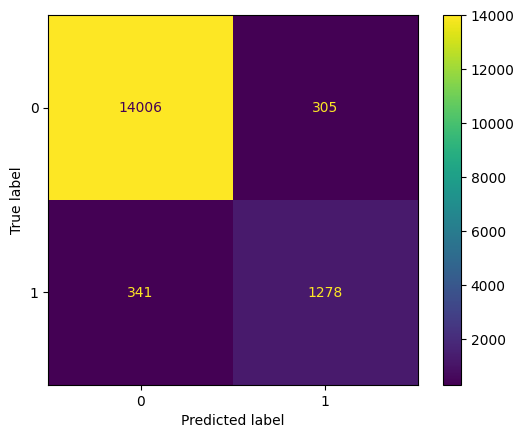

In [54]:
cm = confusion_matrix(y_test, pred_test_LSVC)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

**Вывод по пункту 3:**       
+ показатели F1 модели LinearSVC = 0.7983, что больше 0,75.     
+ модель можносчитать адекватной     
+ распределение классов у нас идёт 9:1. LinearSVC-модель немного лучше предсказыват 0. FP и FN примерно одинаковые.    


## Проект для "Викишоп" с BERT

In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

**Учитывая совсем скромные характеристики моего компьютера, я предположил, что создание эмбеддингов и обучение на них продлится как раз до окончания нашего обучения, примерно до осени))) Поэтому я взял выборку в 1000 строк. GPU добавить не имею возможности, у меня интегрированная видеокарта.(**

In [56]:
# df_bert = data.sample(1000).reset_index(drop=True)
df_bert = data.copy()

**При токенизации оставим максимальную длину 512, так как она не может быть больше 512. Выставил параметр truncation=True.
'Token indices sequence length is longer than the specified maximum sequence length for this model (718 > 512). Running this sequence through the model will result in indexing errors'**

In [57]:
tokenizer = transformers.AutoTokenizer.from_pretrained('unitary/toxic-bert')

tokenized = df_bert['text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True))

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

In [58]:
model = transformers.AutoModel.from_pretrained('unitary/toxic-bert').to(device)

Some weights of the model checkpoint at unitary/toxic-bert were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [61]:
%%time
batch_size = 200
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).to(device)

        with torch.no_grad():
            batch_embeddings = model(batch.to(device), attention_mask=attention_mask_batch.to(device))

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())

  0%|          | 0/796 [00:00<?, ?it/s]

CPU times: user 1h 28min 39s, sys: 5.98 s, total: 1h 28min 45s
Wall time: 1h 29min 3s


In [68]:
features = np.concatenate(embeddings)
features.shape

(159200, 768)

In [70]:
X_bert = features
y_bert = df_bert['toxic'][:159200]
y_bert.shape

(159200,)

In [71]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y_bert,
                                                                        test_size=0.1,
                                                                        random_state=RANDOM_STATE,
                                                                        shuffle=True,
                                                                        stratify=y_bert)

In [72]:
X_train_bert.shape, y_train_bert.shape, X_test_bert.shape, y_test_bert.shape

((143280, 768), (143280,), (15920, 768), (15920,))

In [75]:
%%time
model_LSVC_bert = LinearSVC(random_state=RANDOM_STATE, class_weight='balanced')
model_LSVC_bert.fit(X_train_bert, y_train_bert)
pred_bert_test_LSVC = model_LSVC_bert.predict(X_test_bert)
F1 = f1_score(y_test_bert, pred_bert_test_LSVC)
print(f'Показатели F1 модели LinearSVC на фичах с BERT = {F1:.5f}')

Показатели F1 модели LinearSVC на фичах с BERT = 0.90816
CPU times: user 3min 52s, sys: 1.68 s, total: 3min 53s
Wall time: 3min 54s


In [76]:
%%time
model_LR_bert = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')
model_LR_bert.fit(X_train_bert, y_train_bert)
pred_bert_test_LR = model_LR_bert.predict(X_test_bert)
F1 = f1_score(y_test_bert, pred_bert_test_LR)
print(f'Показатели F1 модели логистической регрессии на фичах с BERT = {F1:.5f}')

Показатели F1 модели логистической регрессии на фичах с BERT = 0.92562
CPU times: user 26.4 s, sys: 2.07 s, total: 28.5 s
Wall time: 17.2 s


**Вывод по пункту 4:**     

На фичах обработанных BERT-ом модель показывает метрику гораздо лучше, чем на фичах векторизированных на основе TF-IDF. Поэтому, если позволяет оборудование, конечно лучше ипользовать BERT. Сам процесс требует большой мощности оборудования.

## Общий вывод

**Вывод по пункту 1.:**   
+ при загрузке данных выяснили, что пропуски и дубликаты отсутствуют, классы в таргете не сбалансированы.     
+ лемматизировали и очистили текст от знаков пунктуации и пробелов.           
+ разделили данные на трейн и тест      
+ создали матрицы cо значениями TF-IDF

**Вывод по пункту 2:**    

Мы обучили четыре модели:    
+ модель логической регрессии    
+ модель ансамбля деревьев    
+ модель градиентного бустинга     
+ модель опорных векторов  

**Вывод по пункту 3:**       
+ показатели F1 модели LinearSVC = 0.7983, что больше 0,75.     
+ модель можносчитать адекватной     
+ распределение классов у нас идёт 9:1. LinearSVC-модель немного лучше предсказыват 0. FP и FN примерно одинаковые.   

**Вывод по пункту 4:**     

На фичах обработанных BERT-ом модель показывает метрику гораздо лучше, чем на фичах векторизированных на основе TF-IDF. Поэтому, если позволяет оборудование, конечно лучше ипользовать BERT. Сам процесс требует большой мощности оборудования.

**Мы обучили модель классифицировать комментарии на позитивные и негативные. Построили модель со значением метрики качества F1 не меньше 0.75. Здесь можно добавить, что для каждой конкретной задачи нужно искать свой подход и свои варианты решения. Если рассматривать обучение на основе расчёта TF-IDF, то модели с поддержкой векторных данных показала лучшую метрику за минимальное время. Ну и, конечно, если позволяет мощность оборудования, то лучше использовать BERT.**